In [79]:
import pandas as pd
import numpy as np
import glob
import os
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_columns', 50)

In [61]:
fn = glob.glob('./results/performances/result-*.csv')
dfs = {}

In [62]:
for item in fn:
    print (item, os.path.getsize(item))

./results/performances/result-1600906966-random-5.csv 347
./results/performances/result-1600907085-random-5.csv 347
./results/performances/result-1600907321-random-5.csv 1922
./results/performances/result-1600907375-xgb-5.csv 347
./results/performances/result-1600907428-xgb-5.csv 1037
./results/performances/result-1600907522-hybrid-5.csv 347
./results/performances/result-1600907621-hybrid-5.csv 542
./results/performances/result-1600908233-hybrid-5.csv 737
./results/performances/result-1600908573-hybrid-5.csv 347
./results/performances/result-1600908691-hybrid-5.csv 347
./results/performances/result-1600909354-hybrid-5.csv 347
./results/performances/result-1600909533-hybrid-5.csv 933
./results/performances/result-1600911017-hybrid-5.csv 7711
./results/performances/result-1600926325-random-5.csv 1336
./results/performances/result-1600926368-random-5.csv 756
./results/performances/result-1600927158-random-5.csv 754
./results/performances/result-1600927324-xgb-5.csv 369
./results/performan

In [4]:
for name in fn:
    dfs[name] = pd.read_csv(name, sep=',')

In [5]:
for name in fn:
    print(name, dfs[name]['mode'].unique()[0], round(np.mean(dfs[name]['precision']), 4), round(np.mean(dfs[name]['recall']), 4), round(np.mean(dfs[name]['revenue']), 4))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [99]:
df = pd.read_csv('./results/performances/result-1600964265-DATE-5.csv', sep=',')

In [100]:
df.columns

Index(['runID', 'data', 'num_train', 'num_valid', 'num_test', 'num_select',
       'num_total_newly_labeled', 'num_test_illicit', 'test_illicit_rate',
       'upper_bound_precision', 'upper_bound_recall', 'upper_bound_rev',
       'sampling', 'initial_inspection_rate', 'final_inspection_rate', 'mode',
       'subsamplings', 'weights', 'unc_mode', 'train_start', 'valid_start',
       'test_start', 'test_end', 'numWeek', 'precision', 'recall', 'revenue',
       'norm-precision', 'norm-recall', 'norm-revenue'],
      dtype='object')

In [101]:
df

,runID,data,num_train,num_valid,num_test,num_select,num_total_newly_labeled,num_test_illicit,test_illicit_rate,upper_bound_precision,upper_bound_recall,upper_bound_rev,sampling,initial_inspection_rate,final_inspection_rate,mode,subsamplings,weights,unc_mode,train_start,valid_start,test_start,test_end,numWeek,precision,recall,revenue,norm-precision,norm-recall,norm-revenue
0,1600964265,real-t,14374,16832,16134,806,806,1344,0.083302,1.0,0.600223,0.975570,DATE,50,5,scratch,-,-,naive,15-01-01,15-01-17,15-02-01,15-02-08,1,0.1141,0.0685,0.0311,0.1141,0.1140,0.0319
1,1600964265,real-t,44710,18523,16332,816,1622,1037,0.063495,1.0,0.787464,0.989641,DATE,50,5,scratch,-,-,naive,15-01-01,15-01-24,15-02-08,15-02-15,2,0.1961,0.1543,0.1860,0.1961,0.1959,0.1879
2,1600964265,real-t,61079,2970,17474,873,2495,1509,0.086357,1.0,0.578993,0.983715,DATE,50,5,scratch,-,-,naive,15-01-01,15-01-31,15-02-15,15-02-22,3,0.2749,0.1590,0.4472,0.2749,0.2747,0.4546
3,1600964265,real-t,63157,1765,17302,865,3360,1255,0.072535,1.0,0.689323,0.984240,DATE,50,5,scratch,-,-,naive,15-01-01,15-02-07,15-02-22,15-03-01,4,0.2543,0.1753,0.3656,0.2543,0.2543,0.3714
4,1600964265,real-t,63980,1807,18687,934,4294,1152,0.061647,1.0,0.811068,0.994443,DATE,50,5,scratch,-,-,naive,15-01-01,15-02-14,15-03-01,15-03-08,5,0.1017,0.0825,0.0943,0.1017,0.1017,0.0949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1600964265,real-t,226970,913,10697,534,165990,965,0.090212,1.0,0.554249,0.967704,DATE,50,5,scratch,-,-,naive,15-01-01,18-10-13,18-10-28,18-11-04,196,0.1667,0.0922,0.0649,0.1667,0.1664,0.0671
196,1600964265,real-t,227387,1030,8668,433,166423,679,0.078334,1.0,0.638292,0.979821,DATE,50,5,scratch,-,-,naive,15-01-01,18-10-20,18-11-04,18-11-11,197,0.1547,0.0987,0.0611,0.1547,0.1546,0.0623
197,1600964265,real-t,227851,999,10247,512,166935,1022,0.099737,1.0,0.501321,0.973011,DATE,50,5,scratch,-,-,naive,15-01-01,18-10-27,18-11-11,18-11-18,198,0.3066,0.1536,0.4523,0.3066,0.3064,0.4648
198,1600964265,real-t,228351,1011,7661,383,167318,700,0.091372,1.0,0.547214,0.961328,DATE,50,5,scratch,-,-,naive,15-01-01,18-11-03,18-11-18,18-11-25,199,0.1593,0.0871,0.0667,0.1593,0.1592,0.0694


In [102]:
df.columns

Index(['runID', 'data', 'num_train', 'num_valid', 'num_test', 'num_select',
       'num_total_newly_labeled', 'num_test_illicit', 'test_illicit_rate',
       'upper_bound_precision', 'upper_bound_recall', 'upper_bound_rev',
       'sampling', 'initial_inspection_rate', 'final_inspection_rate', 'mode',
       'subsamplings', 'weights', 'unc_mode', 'train_start', 'valid_start',
       'test_start', 'test_end', 'numWeek', 'precision', 'recall', 'revenue',
       'norm-precision', 'norm-recall', 'norm-revenue'],
      dtype='object')

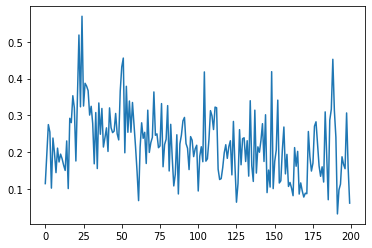

In [105]:
import matplotlib.pyplot as plt
plt.plot(df['norm-recall'])
plt.show()

In [98]:
np.mean(df['precision']), np.mean(df['recall']), np.mean(df['revenue'])

(0.524363, 0.5936465, 0.5609495)